## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
import random

import datetime
from datetime import datetime, timedelta

#import os
#import zipfile
import scipy.stats

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.2)

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import scipy.cluster.hierarchy as sch

from sklearn.decomposition import KernelPCA, PCA

#from pycaret.clustering import *

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None )
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,customer_id,purchase_amount,date_of_purchase,days_since
0,760,25.00,2009-11-06,2246.67
1,860,50.00,2012-09-28,1189.67
2,1200,100.00,2005-10-25,3719.67
3,1420,50.00,2009-07-09,2366.67
4,1940,70.00,2013-01-25,1070.67
...,...,...,...,...
51238,163230,30.00,2011-11-12,1510.67
51239,154410,100.00,2013-11-15,776.67
51240,189270,30.00,2014-12-23,373.67
51241,173810,30.00,2015-05-28,217.67


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       51243 non-null  int64  
 1   purchase_amount   51243 non-null  float64
 2   date_of_purchase  51243 non-null  object 
 3   days_since        51243 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,customer_id,purchase_amount,days_since
count,51243.00,51243.00,51243.00
mean,108934.55,62.34,1631.61
std,67650.61,156.61,1061.08
min,10.00,5.00,0.67
25%,57720.00,25.00,732.67
50%,102440.00,30.00,1499.67
75%,160525.00,60.00,2539.67
max,264200.00,4500.00,4015.67


In [6]:
df.columns

Index(['customer_id', 'purchase_amount', 'date_of_purchase', 'days_since'], dtype='object')

In [7]:
df.drop(['customer_id', 'date_of_purchase'], axis=1, inplace=True)

In [8]:
df

,purchase_amount,days_since
0,25.00,2246.67
1,50.00,1189.67
2,100.00,3719.67
3,50.00,2366.67
4,70.00,1070.67
...,...,...
51238,30.00,1510.67
51239,100.00,776.67
51240,30.00,373.67
51241,30.00,217.67


In [9]:
X = df.iloc[:,0:]

In [10]:
X.values

array([[  25.        , 2246.66666667],
       [  50.        , 1189.66666667],
       [ 100.        , 3719.66666667],
       ...,
       [  30.        ,  373.66666667],
       [  30.        ,  217.66666667],
       [  50.        , 1492.66666667]])

## Standardize all values

In [11]:
scaler = StandardScaler()

In [12]:
X_scaled = scaler.fit_transform(X)

In [13]:
X_scaled

array([[-0.23841595,  0.5796627 ],
       [-0.07877893, -0.4165048 ],
       [ 0.24049513,  1.96788855],
       ...,
       [-0.20648855, -1.18554234],
       [-0.20648855, -1.33256423],
       [-0.07877893, -0.13094307]])

## K-Means Clustering

### Using Elbow Method

In [14]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

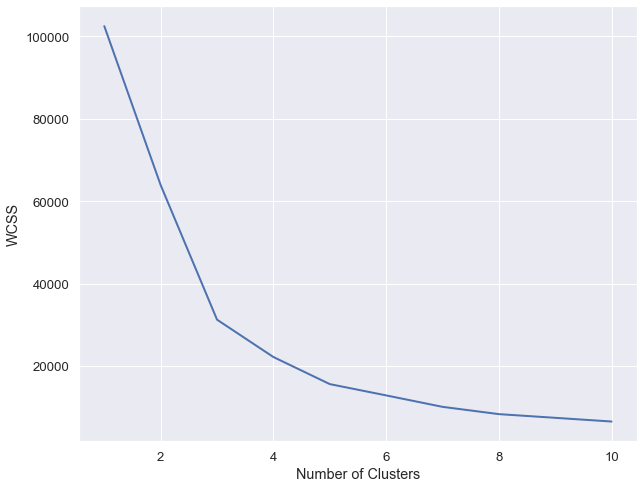

In [15]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [16]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)

In [17]:
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

In [18]:
labels = kmeans.labels_
labels

array([0, 1, 0, ..., 1, 1, 1])

In [20]:
df["Labels"] = kmeans.labels_

In [21]:
df.head()

,purchase_amount,days_since,Labels
0,25.00,2246.67,0
1,50.00,1189.67,1
2,100.00,3719.67,0
3,50.00,2366.67,0
4,70.00,1070.67,1


In [22]:
df.Labels.value_counts()

1    27583
0    23328
2      332
Name: Labels, dtype: int64

In [24]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.10454784,  0.94229404],
       [-0.03130411, -0.79288934],
       [ 9.94684694, -0.3360504 ]])

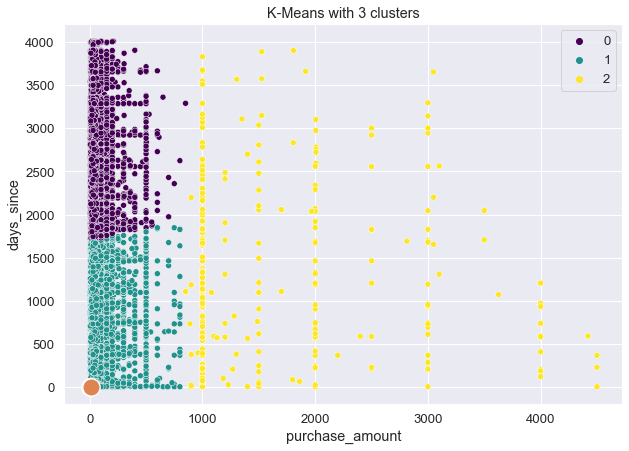

In [25]:
plt.figure(figsize=(10,7))

sns.scatterplot(x=df["purchase_amount"], y=df["days_since"], hue=df["Labels"], palette="viridis")
sns.scatterplot(x=centroids[:,0],y=centroids[:,1], s=300)
plt.title("K-Means with 3 clusters")

plt.show()

### Analysis Results

In [ ]:
df_segm_kmeans = df.copy()

In [ ]:
df_segm_kmeans

In [ ]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [ ]:
df_segm_kmeans

In [ ]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [ ]:
df_segm_analysis

In [ ]:
#df_segm_analysis['NoofObservations'] = df_segm_kmeans[['Segment K-Means',0]].groupby(['Segment K-Means']).count()

In [ ]:
#df_segm_analysis['ProportionofObservations'] = df_segm_analysis['NoofObservations']/ df_segm_analysis['NoofObservations'].sum()

In [ ]:
#df_segm_analysis

In [ ]:
df_segm_analysis.rename({0: 'A',
                         1: 'B',
                         2: 'C',
                         3: 'D'},inplace=True)

In [ ]:
df_segm_analysis

In [ ]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'A',
                                                                  1: 'B',
                                                                  2: 'C',
                                                                  3: 'D'})

In [ ]:
df_segm_kmeans

### Plot the clusters

In [ ]:
x_axis = df_segm_kmeans[0]
y_axis = df_segm_kmeans[1]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','c','m'])
plt.title('Segmentation K-Means')
plt.show()

In [ ]:
x_axis = df_segm_kmeans['Edu']
y_axis = df_segm_kmeans['Age']
z_axis = df_segm_kmeans['Income']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_axis,y_axis,z_axis,c=z_axis, cmap='viridis')

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

plt.show()

## PyCaret Method

In [ ]:
exp_clu101 = setup(data, normalize = True, 
                   ignore_features = ['MouseID'],
                   session_id = 123)

In [ ]:
kmeans = create_model('kmeans')

In [ ]:
print(kmeans)

In [ ]:
kmodes = create_model('kmodes', num_clusters = 6)

In [ ]:
print(kmodes)

In [ ]:
models()

In [ ]:
kmean_results = assign_model(kmeans)
kmean_results.head()

In [ ]:
plot_model(kmeans)

In [ ]:
plot_model(kmeans, plot = 'elbow')

In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'class')

In [ ]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

In [ ]:
save_model(kmeans,'Final Kmeans Model 08Feb2020')

## MeanShift Clustering

In [ ]:
bandwidth = estimate_bandwidth(X,quantile=0.95, random_state=0) #Adjust Bandwidth to get clusters
bandwidth

In [ ]:
meanshift = MeanShift(bandwidth=bandwidth)
meanshift

In [ ]:
labels = meanshift.fit_predict(X)

In [ ]:
np.unique(labels)

### Results

In [ ]:
df_segm_meanshift = df.copy()

In [ ]:
df_segm_meanshift

In [ ]:
df_segm_meanshift['Segment MeanShift'] = labels

In [ ]:
df_segm_meanshift

In [ ]:
df_segm_meanshift['Labels'] = df_segm_meanshift['Segment MeanShift'].map({0: 'A',
                                                                          1: 'B',
                                                                          2: 'C',
                                                                          3: 'D',
                                                                          4: 'E',
                                                                          })

In [ ]:
df_segm_meanshift

### Plot the clusters

In [ ]:
x_axis = df_segm_meanshift['bldgarea']
y_axis = df_segm_meanshift['bldgdepth']
plt.figure(figsize=(15,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_meanshift['Segment MeanShift'],palette=['g','r','c','m','y'])
plt.title('Segmentation MeanShift')
plt.show()

## DBSCAN method

In [ ]:
epsilon = 0.3
minimumSamples = 50
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X_transform)

In [ ]:
labels= db.labels_
labels

In [ ]:
y = pd.DataFrame(labels,columns=['Cluster'])

In [ ]:
y

In [ ]:
y.value_counts()

In [ ]:
dbdf = pd.concat([df1,y],axis=1)

In [ ]:
dbdf

In [ ]:
dbdf["Cluster"].value_counts()

In [ ]:
#-1 are Outliers, hence need to remove from table
db2 = dbdf[dbdf["Cluster"] != -1]

In [ ]:
db2

In [ ]:
db2['Cluster'].value_counts()

In [ ]:
meandb = db2.groupby(by='Cluster').mean()

In [ ]:
meandb

In [ ]:
x_axis = db2['BldgArea']
y_axis = db2['BuiltFAR']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=db2['Cluster'],palette='viridis')
plt.title('DBScan Plot')
plt.show()

## Principal Component Analysis

In [ ]:
pca2 = PCA(n_components=2)

In [ ]:
X_train_2 = pca2.fit_transform(X_train)

In [ ]:
X_test_2 = pca2.transform(X_test)

In [ ]:
X_train_2[:5]

In [ ]:
X_test_2[:5]

In [ ]:
graph = pd.DataFrame(X_train_2, columns=['A','B'])
graph

In [ ]:
plt.scatter(x=graph.A,y=graph.B)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("")
#plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [ ]:
sns.scatterplot(x=graph.A, y=graph.B)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("")
plt.tight_layout()
plt.show()

In [ ]:
pca10.explained_variance_

In [ ]:
pca10var = pd.DataFrame(pca10.explained_variance_.T, index=['A','B','C','D','E','F','G','H','I','J'], columns=["var"])
pca10var

In [ ]:
pca10var.plot()
plt.title("percent variance explained by PC number")
plt.show()